In [207]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
import random

In [50]:
trainData = pd.read_csv("train.csv")
trainData

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [51]:
trainData.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [52]:
trainData.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [57]:
print(trainData["Destination"].unique())
print(trainData["HomePlanet"].unique())

['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
['Europa' 'Earth' 'Mars' nan]


In [53]:
print(trainData.isnull().sum())
print("Total NaN values:", trainData.isnull().sum().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
Total NaN values: 2324


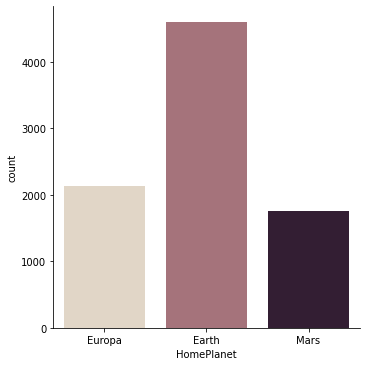

In [80]:
sns.catplot(x="HomePlanet", kind="count", palette="ch:.25", data=trainData)
trainData["HomePlanet"] = trainData["HomePlanet"].fillna(trainData["HomePlanet"].mode()[0])

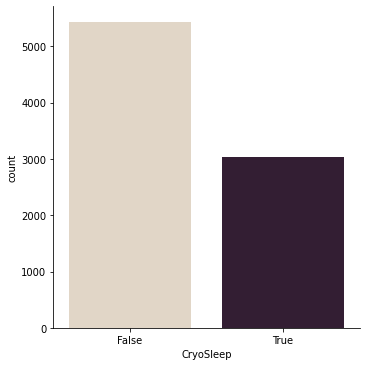

In [82]:
sns.catplot(x="CryoSleep", kind="count", palette="ch:.25", data=trainData)
trainData["CryoSleep"] = trainData["CryoSleep"].fillna(trainData["CryoSleep"].mode()[0])

In [99]:
trainData["Cabin"].fillna(value="Unknown", inplace = True)
trainData["Name"].fillna(value="Unknown", inplace = True)

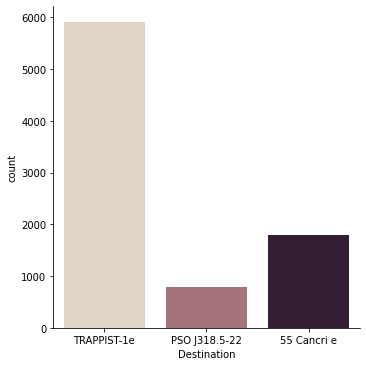

In [89]:
sns.catplot(x="Destination", kind="count", palette="ch:.25", data=trainData)
trainData["Destination"] = trainData["Destination"].fillna(trainData["Destination"].mode()[0])

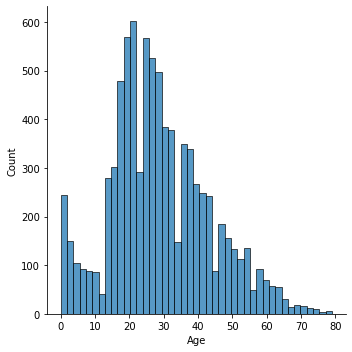

In [96]:
sns.displot(trainData.Age);
trainData["Age"] = trainData["Age"].fillna(trainData["Age"].mode()[0])

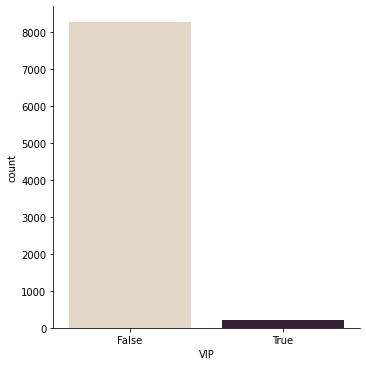

In [98]:
sns.catplot(x="VIP", kind="count", palette="ch:.25", data=trainData)
trainData["VIP"] = trainData["VIP"].fillna(trainData["VIP"].mode()[0])

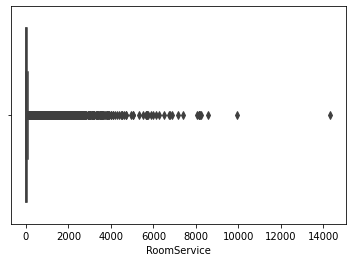

In [109]:
sns.boxplot(x=trainData["RoomService"])
trainData["RoomService"] = trainData["RoomService"].fillna(trainData["RoomService"].median())

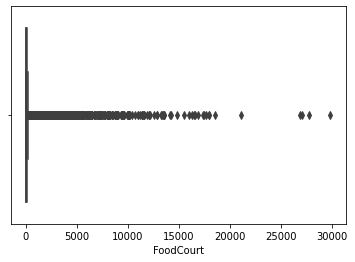

In [112]:
sns.boxplot(x=trainData["FoodCourt"])
trainData["FoodCourt"] = trainData["FoodCourt"].fillna(trainData["FoodCourt"].median())

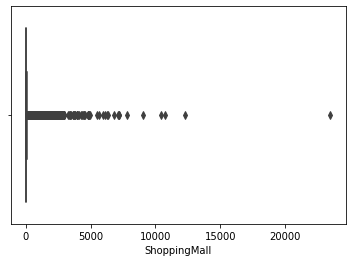

In [114]:
sns.boxplot(x=trainData["ShoppingMall"])
trainData["ShoppingMall"] = trainData["ShoppingMall"].fillna(trainData["ShoppingMall"].median())

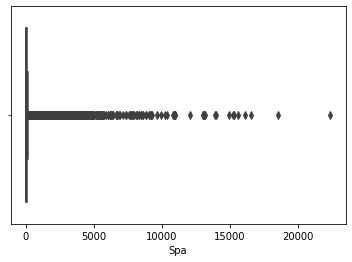

In [116]:
sns.boxplot(x=trainData["Spa"])
trainData["Spa"] = trainData["Spa"].fillna(trainData["Spa"].median())


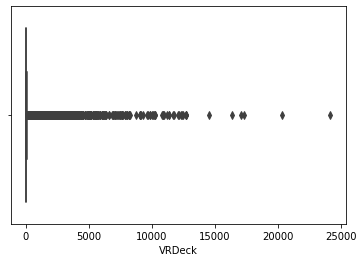

In [118]:
sns.boxplot(x=trainData["VRDeck"])
trainData["VRDeck"] = trainData["VRDeck"].fillna(trainData["VRDeck"].median())



In [119]:
print(trainData.isnull().sum())
print("Total NaN values:", trainData.isnull().sum().sum())

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64
Total NaN values: 0


In [122]:
trainData.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.728517,220.009318,448.434027,169.572300,304.588865,298.261820
std,14.355438,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [125]:
trainData.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [132]:
print(trainData["Destination"].unique())
print(trainData["HomePlanet"].unique())

['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
['Europa' 'Earth' 'Mars']


In [129]:
trainData["HomePlanetN"] = trainData.HomePlanet.map({'Europa':0,'Earth':1, 'Mars':2})
trainData["DestinationN"] = trainData.Destination.map({'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2})

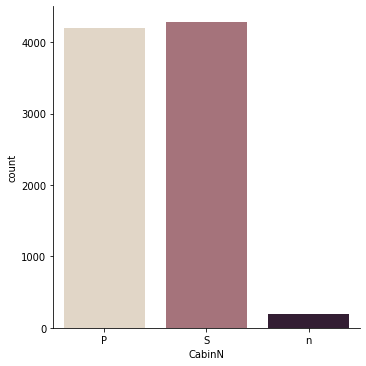

In [175]:
trainData["CabinN"] = trainData["Cabin"].str[-1]
sns.catplot(x="CabinN", kind="count", palette="ch:.25", data=trainData)

In [198]:
((trainData["CabinN"].isin(['P']).sum()) / (trainData["CabinN"].isin(['S']).sum())) - ((trainData["CabinN"].isin(['P']).sum()+99) / (trainData["CabinN"].isin(['S']).sum()+100))

-0.00020791099198624874

In [267]:
Ntabl = trainData[trainData["CabinN"].isin(['n'])]

indList = list(Ntabl.index)

PList = random.sample(indList, 99)
SList = random.sample(indList, 199)
for i in PList[:]:
    SList.remove(i)

for i in SList:
    trainData.CabinN[i] = 'S'

for i in PList:
    trainData.CabinN[i] = 'P'

trainData["CabinN"] = trainData.CabinN.map({'P':0, 'S':1})

ValueError: Sample larger than population or is negative

In [269]:
dTree = tree.DecisionTreeClassifier(max_depth=3).fit(trainData[['HomePlanetN', 'CryoSleep', 'CabinN', 'DestinationN', 'Age',
'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']],trainData.Transported)